In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from DataLoader import DataLoader
import datetime
import random
import warnings
from BehaviourFeatureExtractor import compute_speed, compute_head_angle_to_pup, compute_distance_to_pup, extract_base_parameters, plot_mouse_angle_to_pup, convert_seconds_to_frame, extract_trial_from_DLC

### Quality Check analysis (low likelihoods) overview ###

#### Loading and processing all trials from all days #####

In [ ]:
data_dir = "data"
DL = DataLoader(data_dir)

In [ ]:
days = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
full_data = {}
# get data for d1 experiment
for day in days:
    data = DL.get_data_for_experiment(mouse_id = "MBI5335RR",
                                        day = day)
    full_data[day] = data

    # extract base parameters
    df_dlc, df_summary = data["Behavior"]["df_dlc"], data["Behavior"]["df_summary"]
    data, trials_dict = extract_base_parameters(df_dlc, df_summary)
    full_data[day]["Behavior"]["trials"] = trials_dict


In [9]:
full_data['d1']['Behavior']['trials'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [11]:
full_data['d1']['Behavior']['df_dlc'].head(3)

frame_index  time_seconds     msTop_x    msTop_y  msTop_likelihood  \
151          151      5.033333  170.865509  89.811813          0.961542   
152          152      5.066667  170.884583  89.919662          0.960909   
153          153      5.100000  170.883240  90.323051          0.961621   

     endHeadbar_x  endHeadbar_y  endHeadbar_likelihood  earRight_x  \
151    190.735977     79.387955               0.943847  174.400299   
152    190.975998     79.499725               0.941302  174.574753   
153    191.376846     80.730232               0.936073  174.205078   

     earRight_y  ...  centerNest_y  centerNest_likelihood       pup_x  \
151   80.521759  ...     57.566437               0.910896  477.403198   
152   80.326324  ...     57.520256               0.904566  477.380341   
153   80.630722  ...     57.570263               0.890773  477.362000   

          pup_y  pup_likelihood  ms_speed_px/s  pup_speed_px/s  \
151  251.108810        0.074489            NaN             NaN   
152  251.101379        0.074293            NaN             NaN   
153  251.079193        0.073658            NaN             NaN   

     distance_head_to_pup  distance_mouse_to_pup  head_angle_to_pup_degrees  
151                   NaN                    NaN                        NaN  
152                   NaN                    NaN                        NaN  
153                   NaN                    NaN                        NaN  

[3 rows x 31 columns]

#### Plotting low likelihoods, visual assessment ####

In [59]:
dict_body_parts_to_coords = {
    # "centerNest": {"x": "centerNest_x",
    #                "y": "centerNest_y",
    #                "likelihood": "centerNest_likelihood",
    #                "color": "green"},
    "nose": {"x": "nose_x",
             "y": "nose_y",
             "color": "magenta",
              "likelihood": "nose_likelihood"},
    # "earRight": {"x": "earRight_x",
    #              "y": "earRight_y",
    #              "color": "grey",
    #              "likelihood": "earRight_likelihood"},
    # "earLeft": {"x": "earLeft_x",
    #             "y": "earLeft_y",
    #             "color": "grey",
    #             "likelihood": "earLeft_likelihood"},
    # "tailBase": {"x": "tailBase_x",
    #              "y": "tailBase_y",
    #             "color": "purple",
                #  "likelihood": "tailBase_likelihood"},
    # "msTop": {"x": "msTop_x",
    #           "y": "msTop_y",
    #           "color": "black",
    #           "likelihood": "msTop_likelihood"},
    # "endHeadbar": {"x": "endHeadbar_x",
    #                "y": "endHeadbar_y",
    #                "color": "orange",
    #                "likelihood": "endHeadbar_likelihood"},
    # "pup": {"x": "pup_x",
    #         "y": "pup_y",
    #         "color": "blue",
    #         "likelihood": "pup_likelihood"}
}

In [53]:
d1_trials = full_data['d1']['Behavior']['trials']
print(len(d1_trials))

10


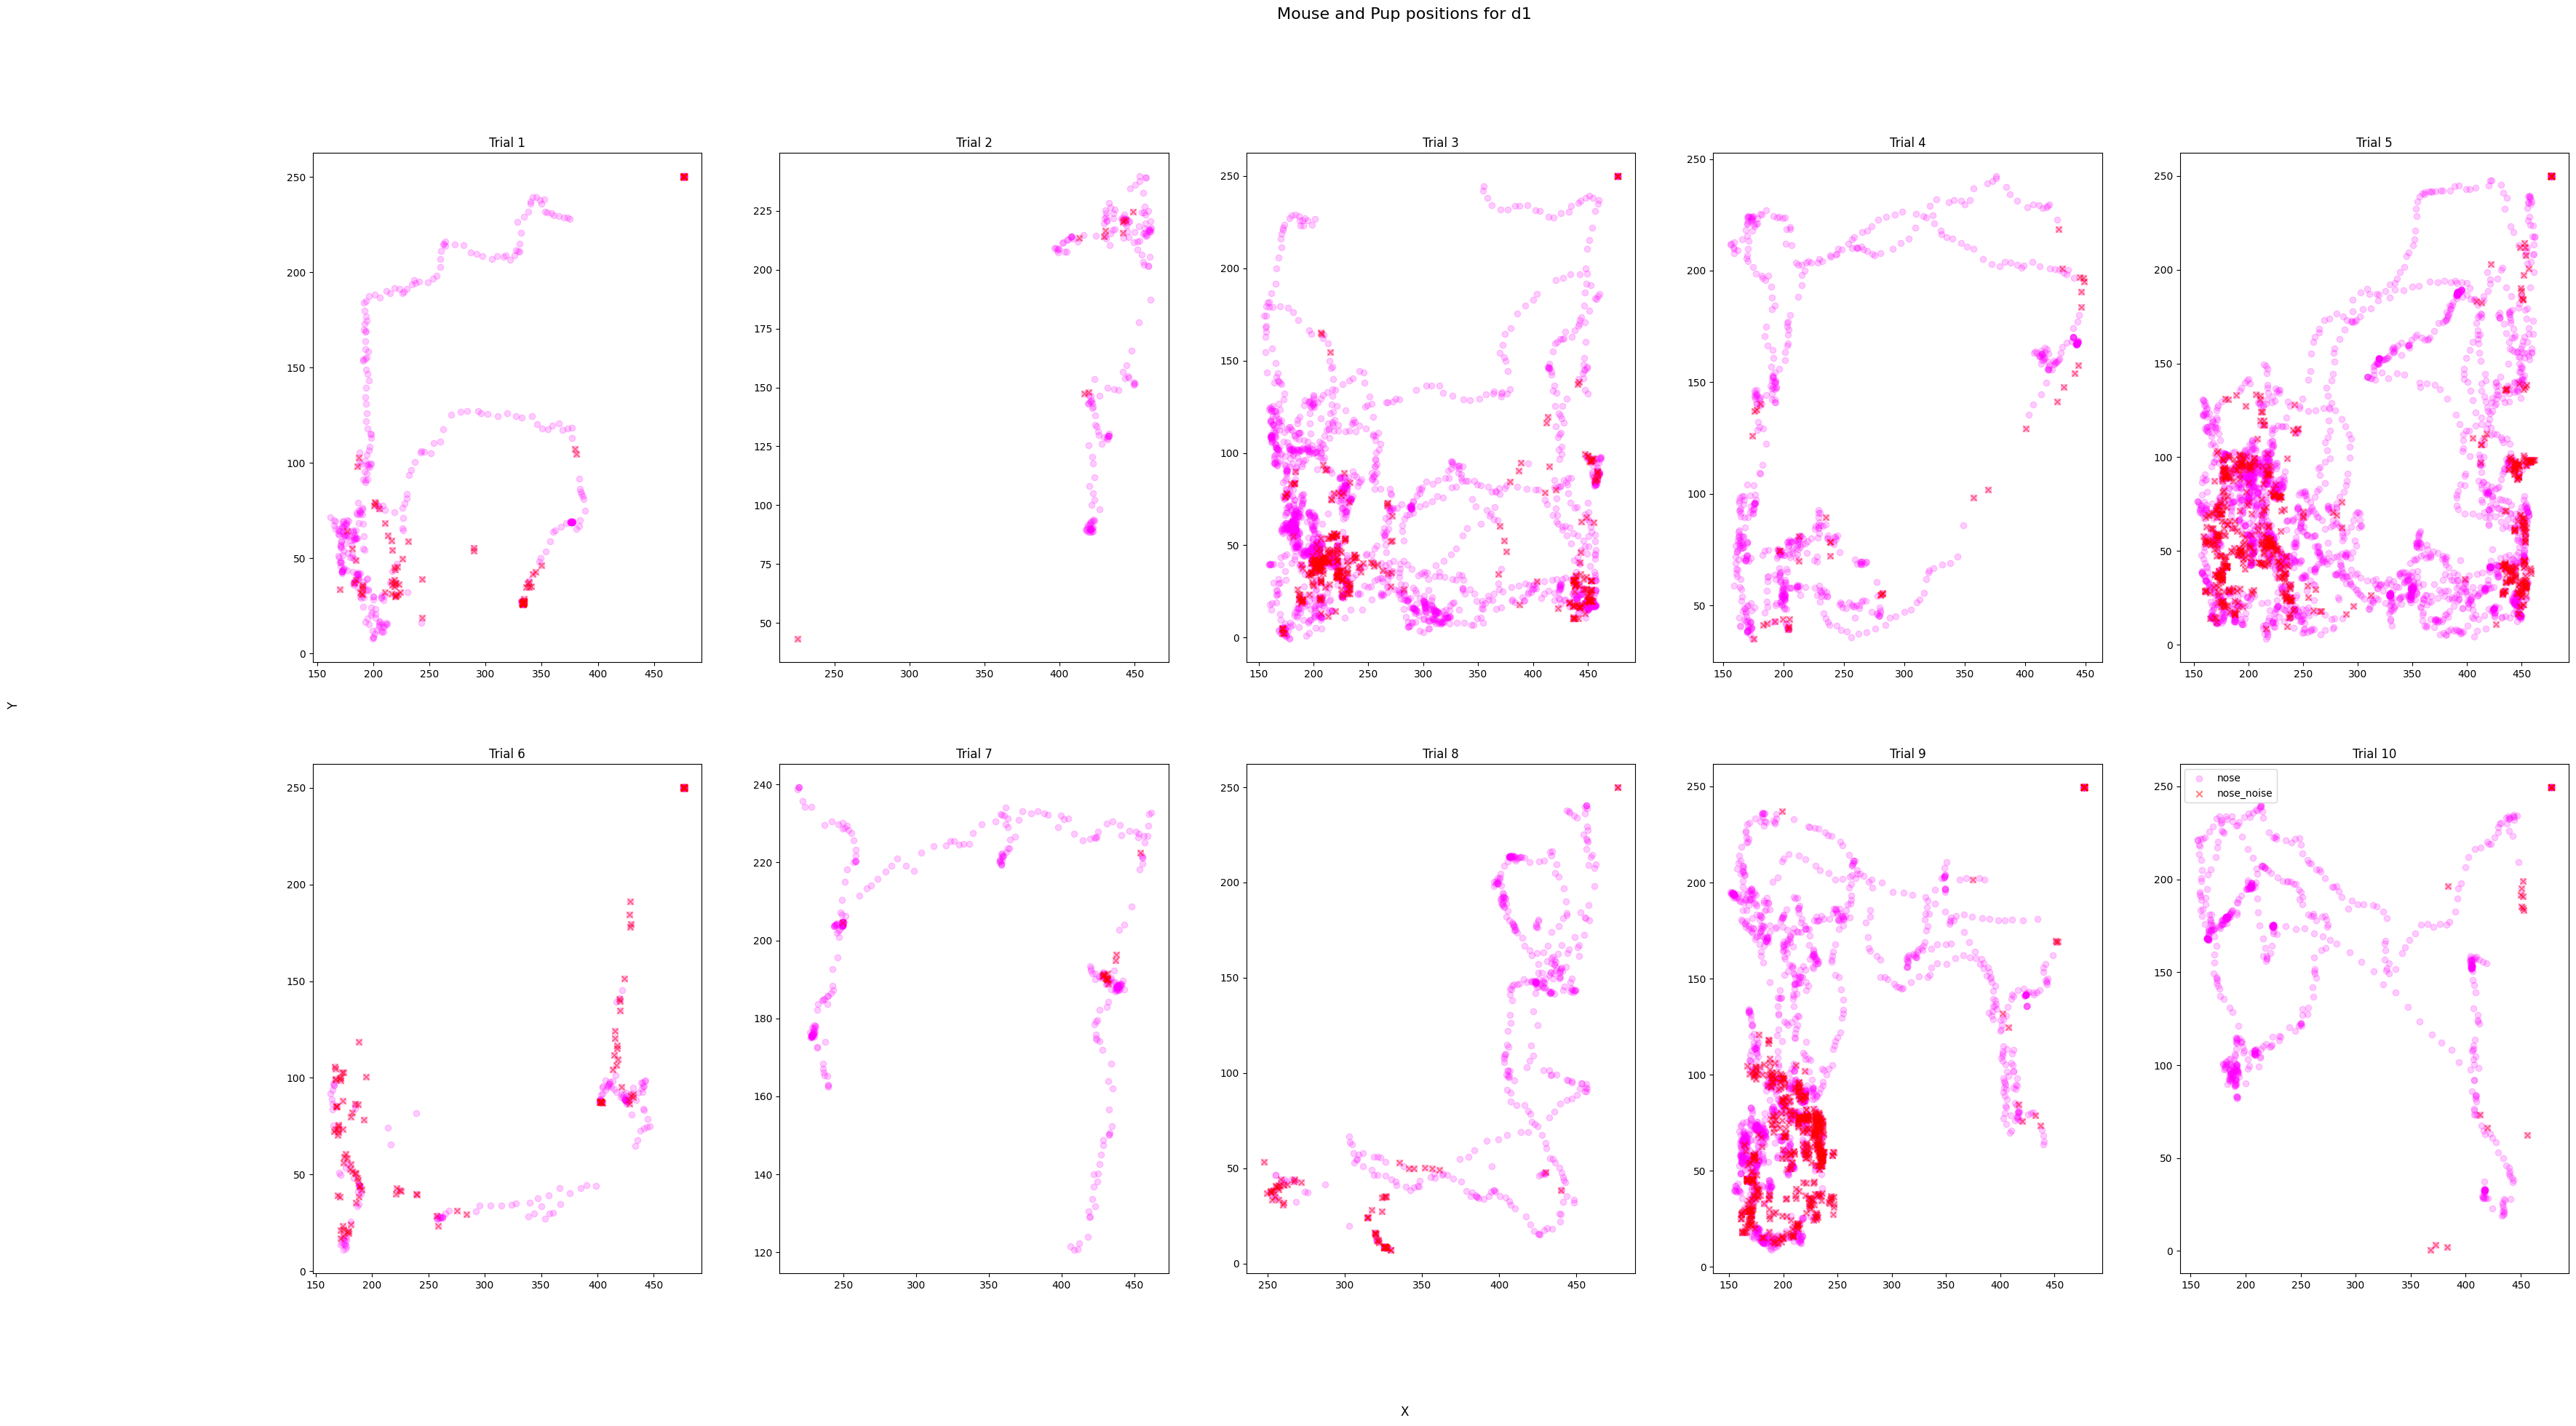

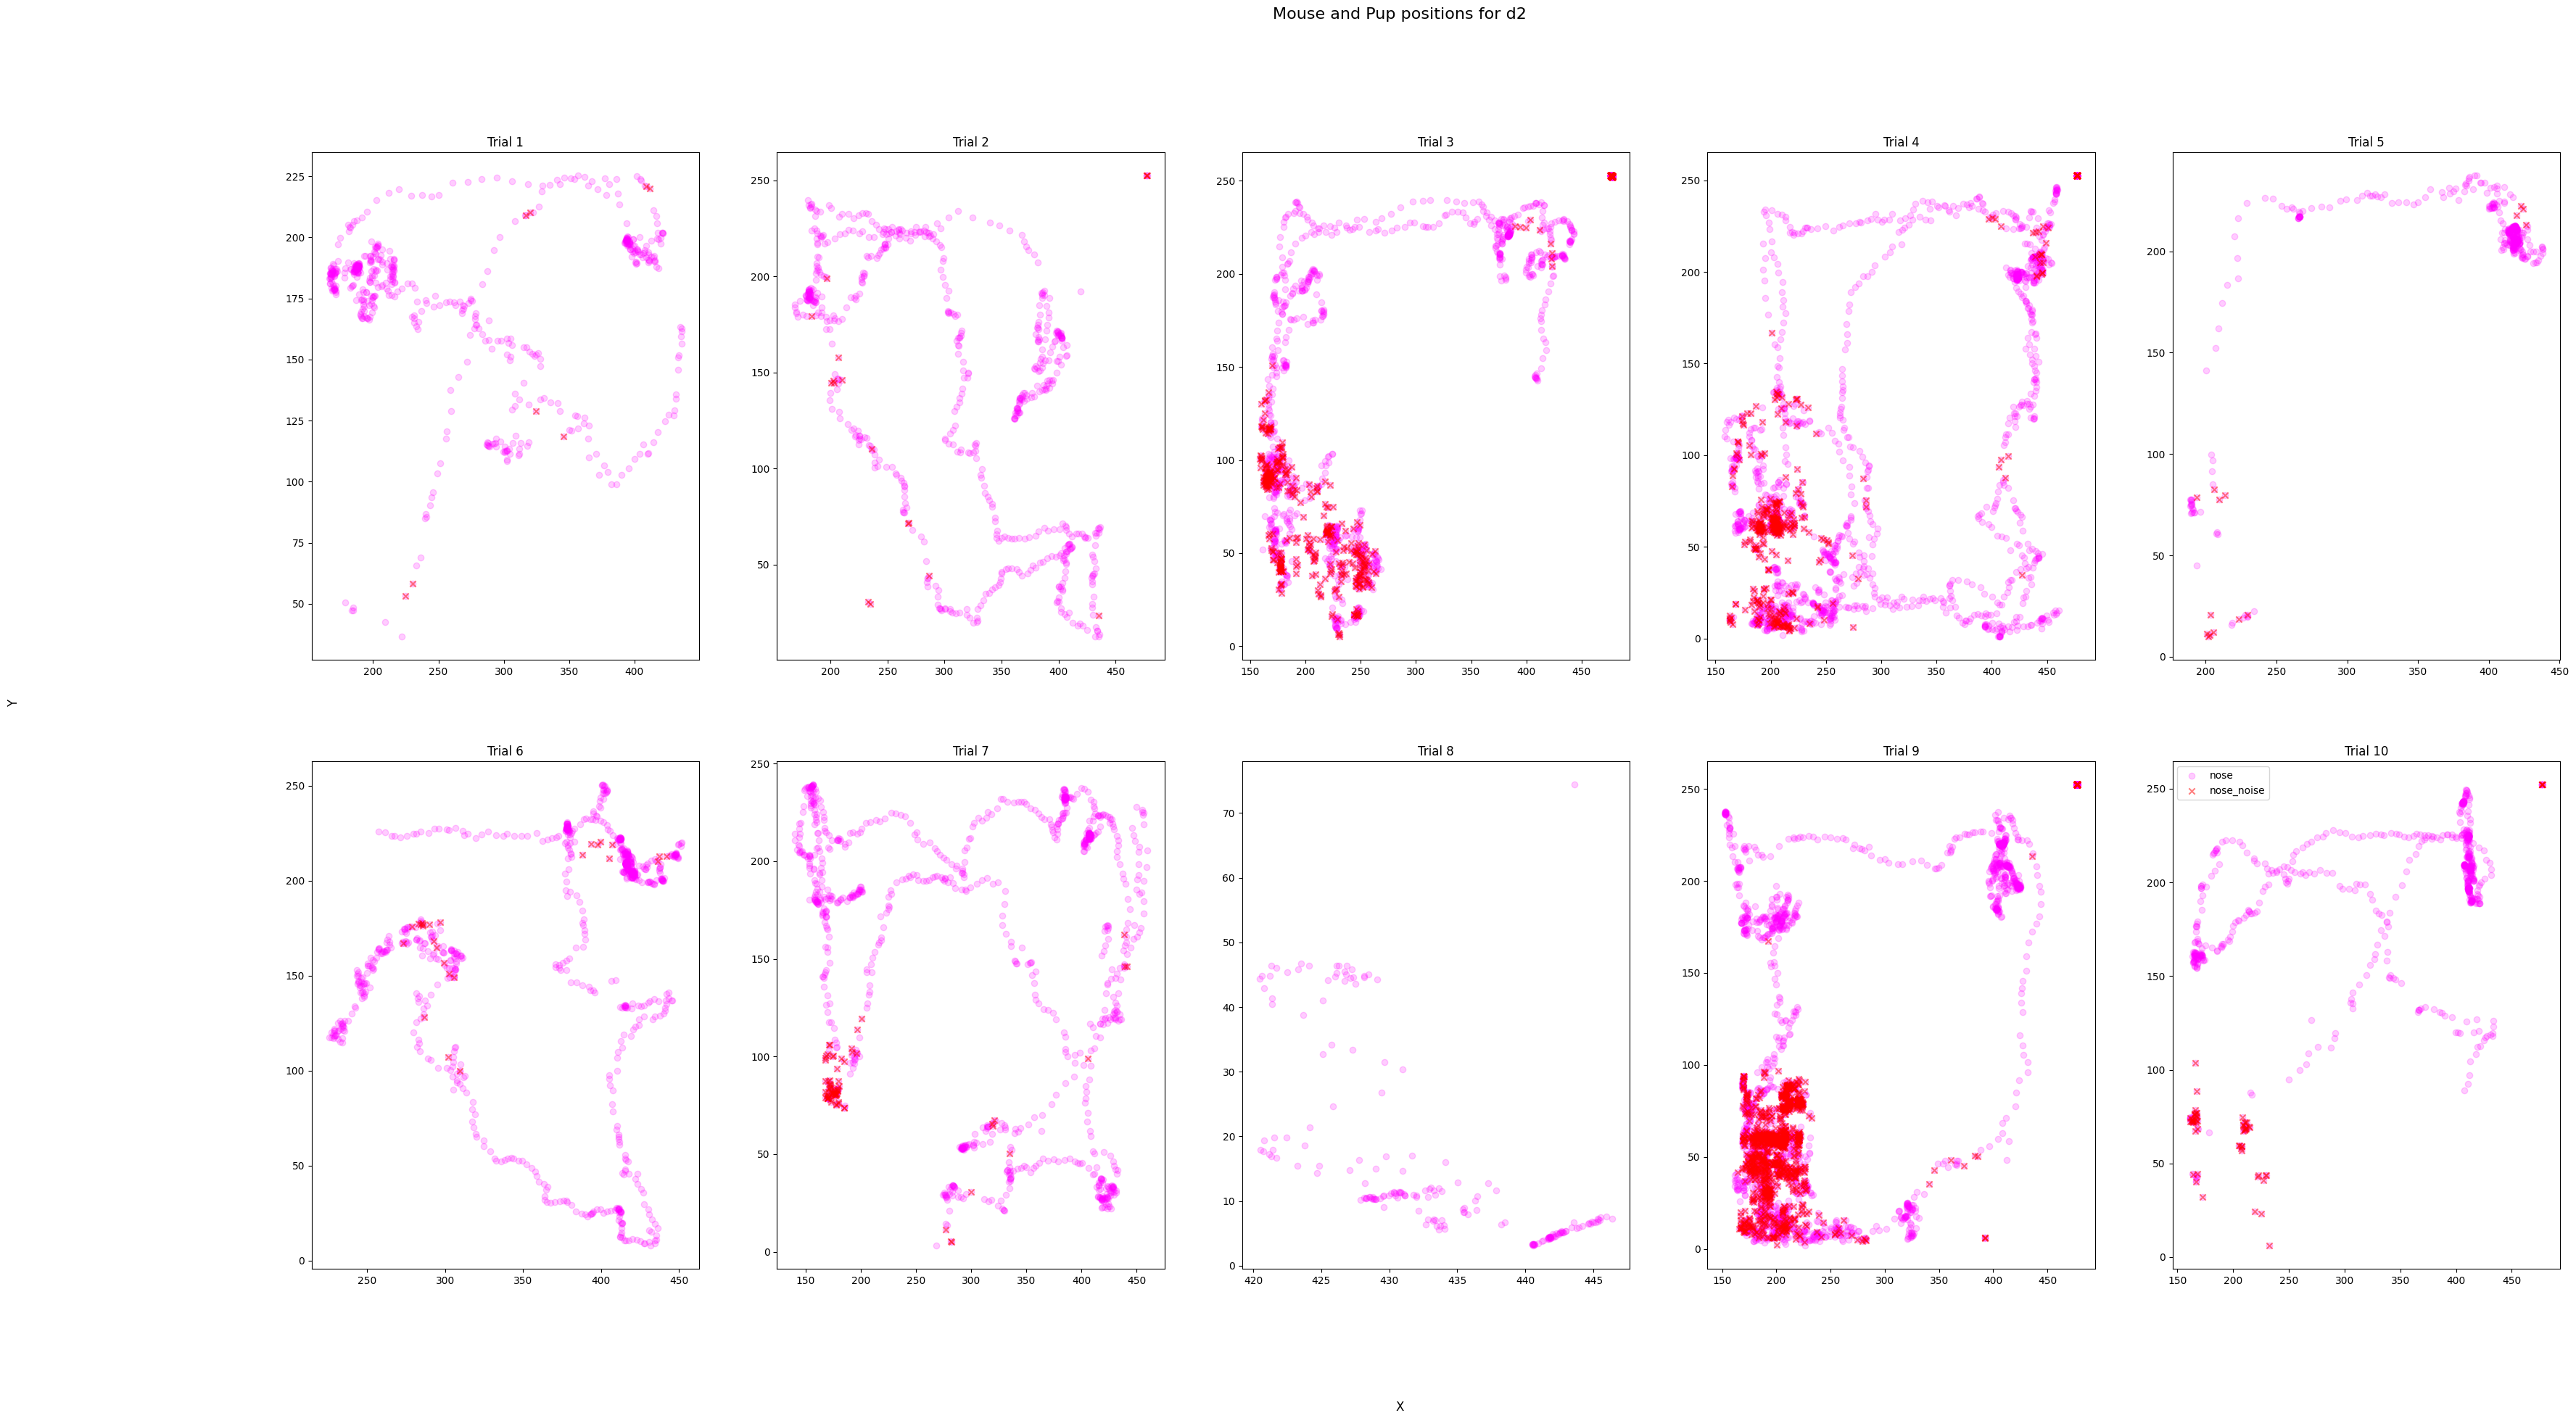

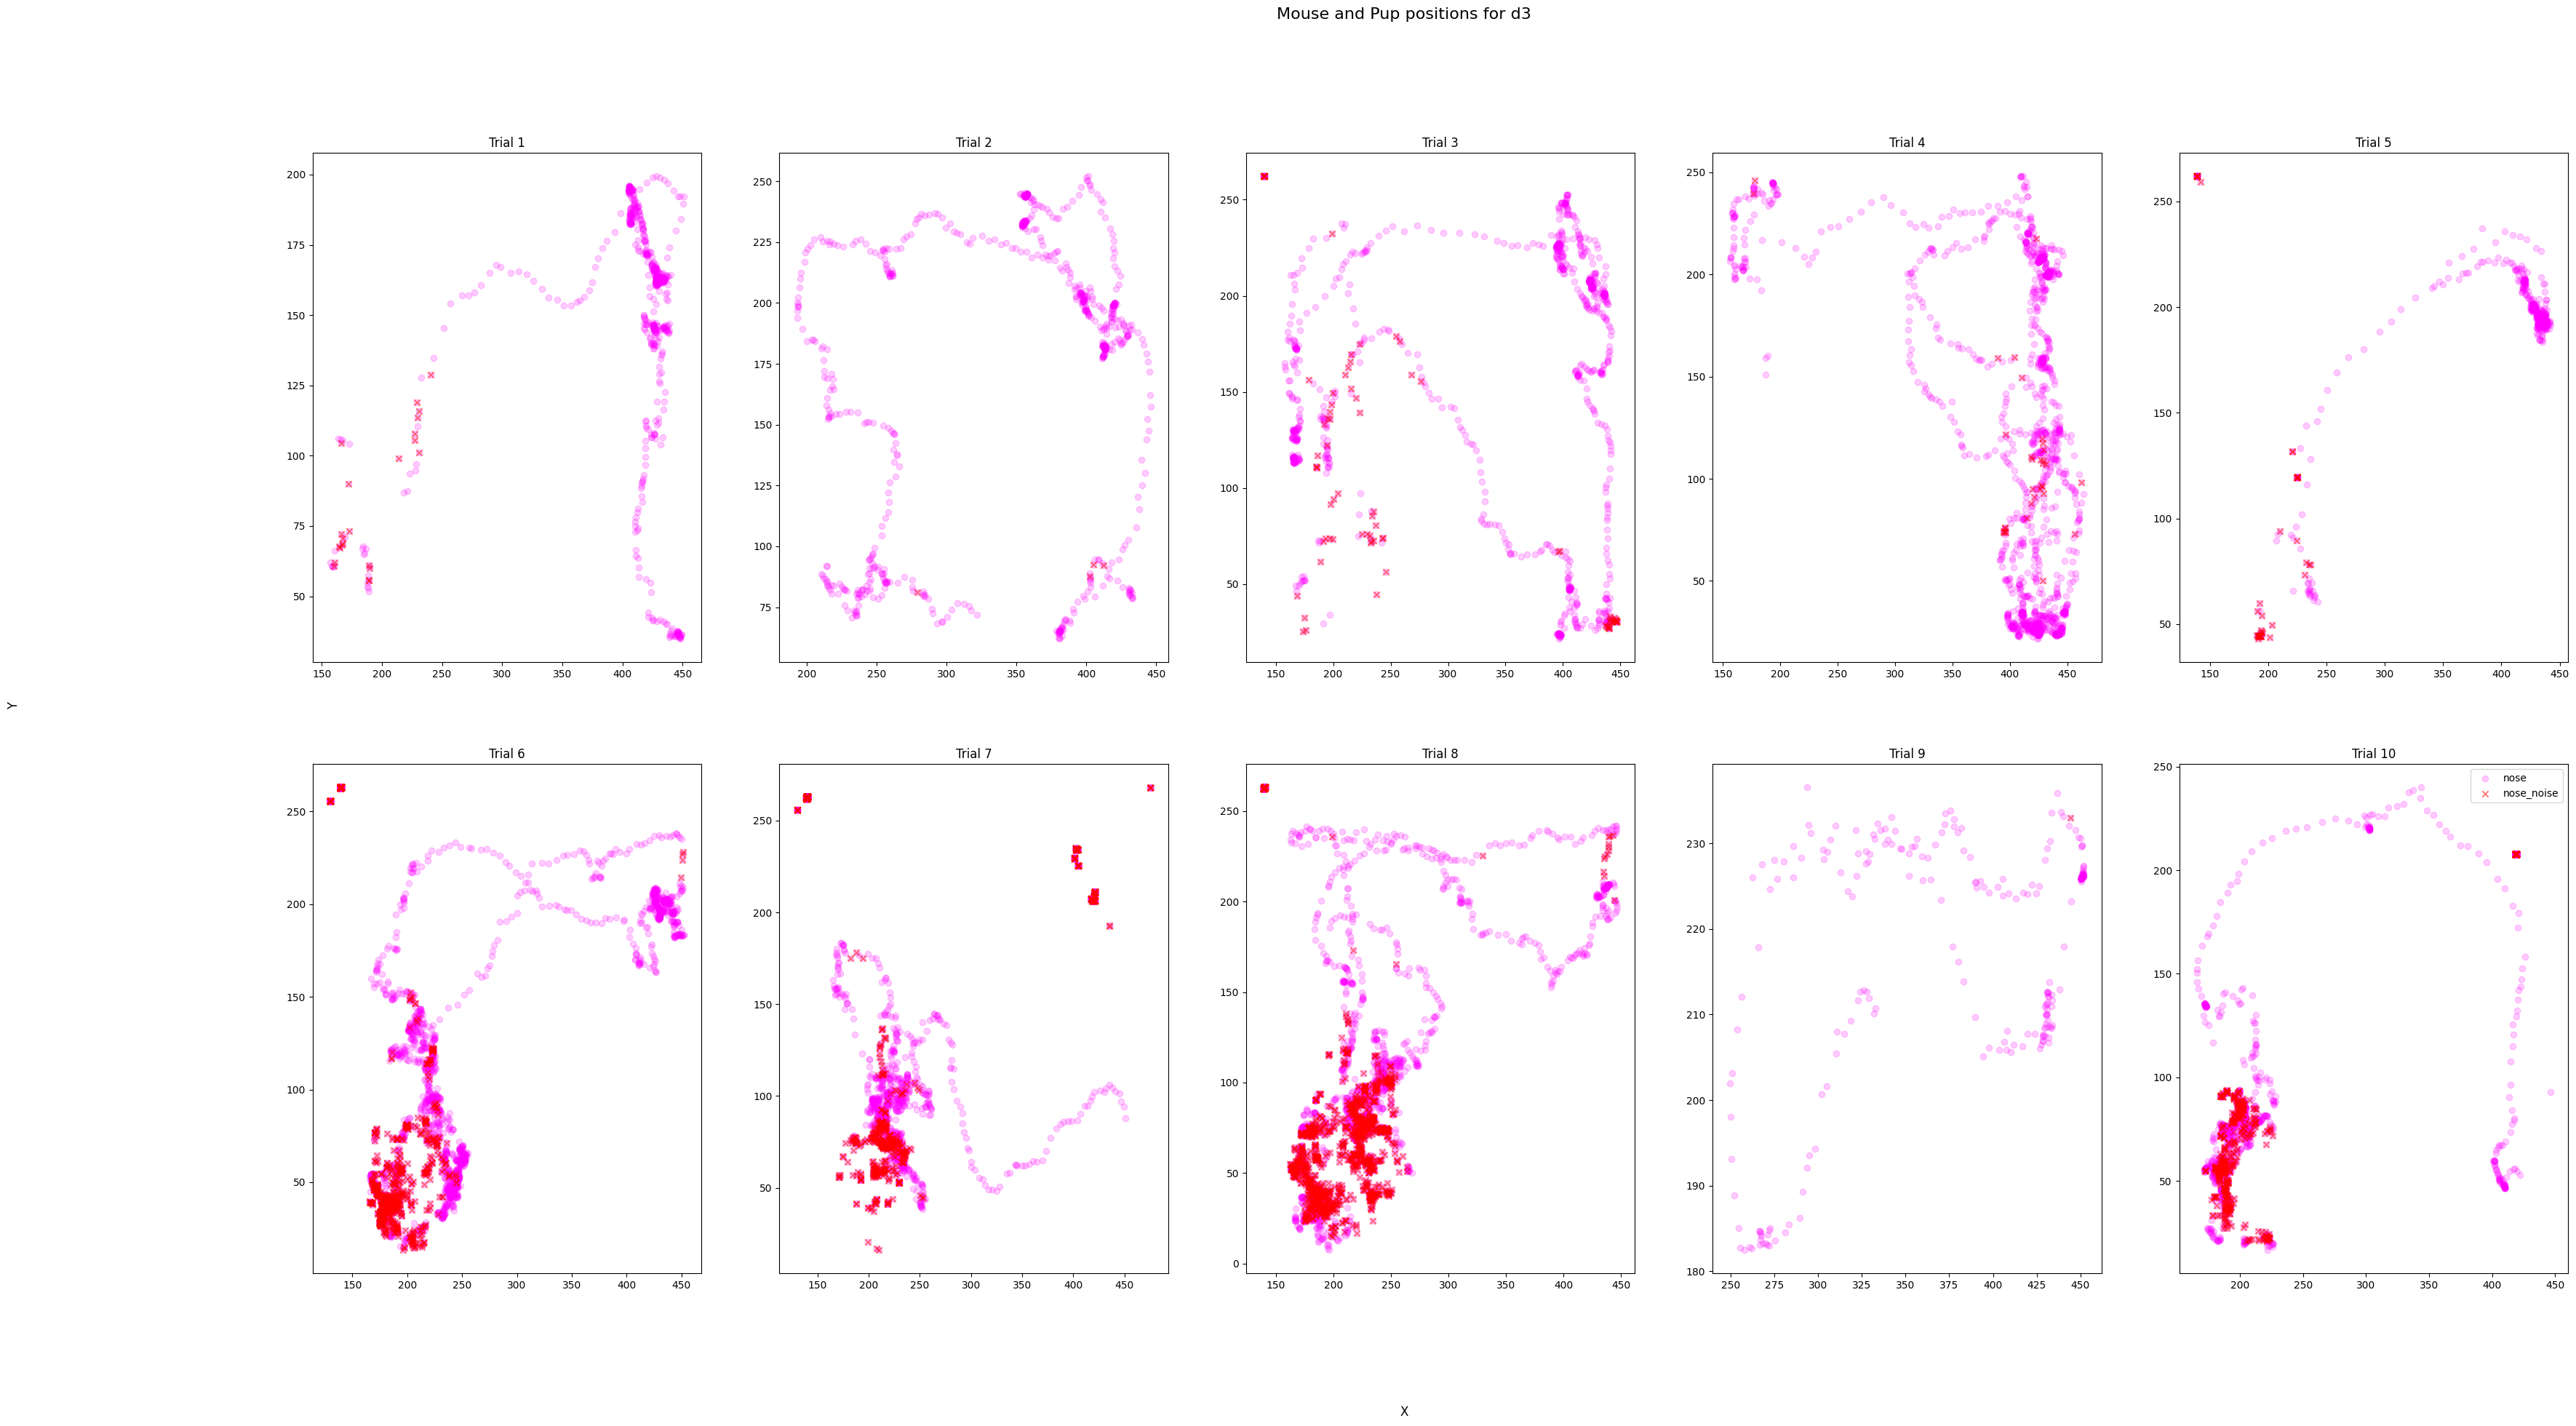

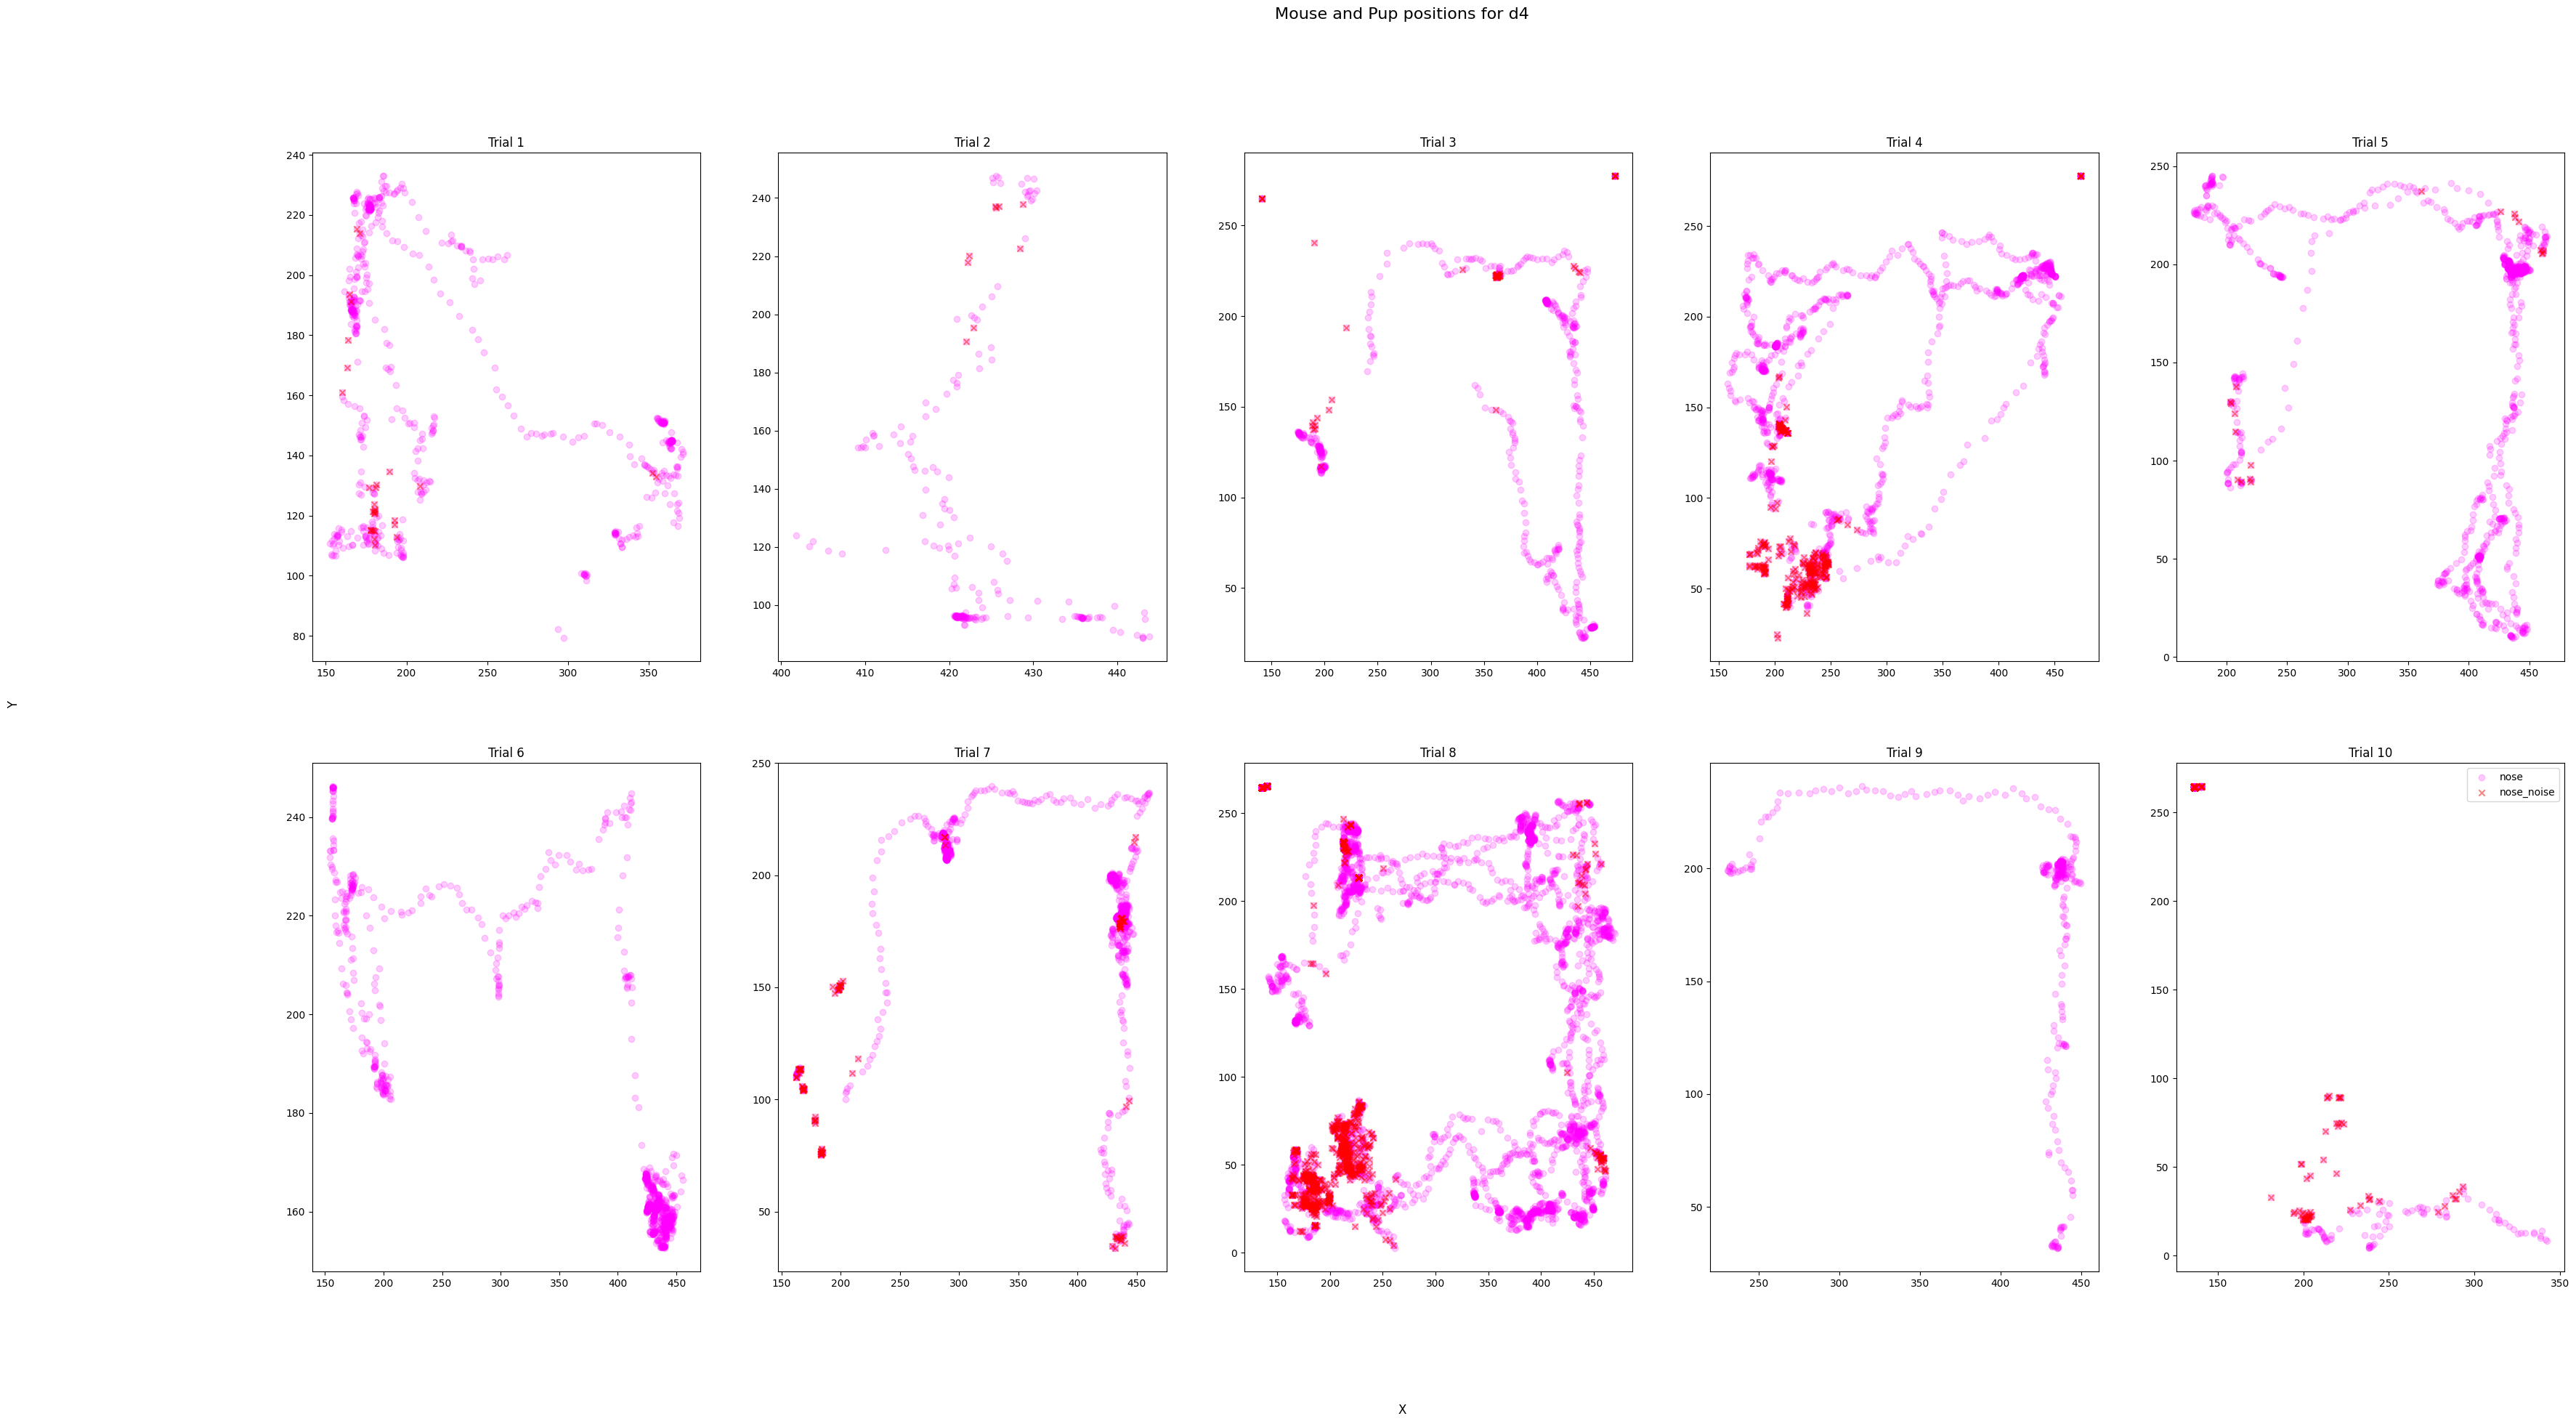

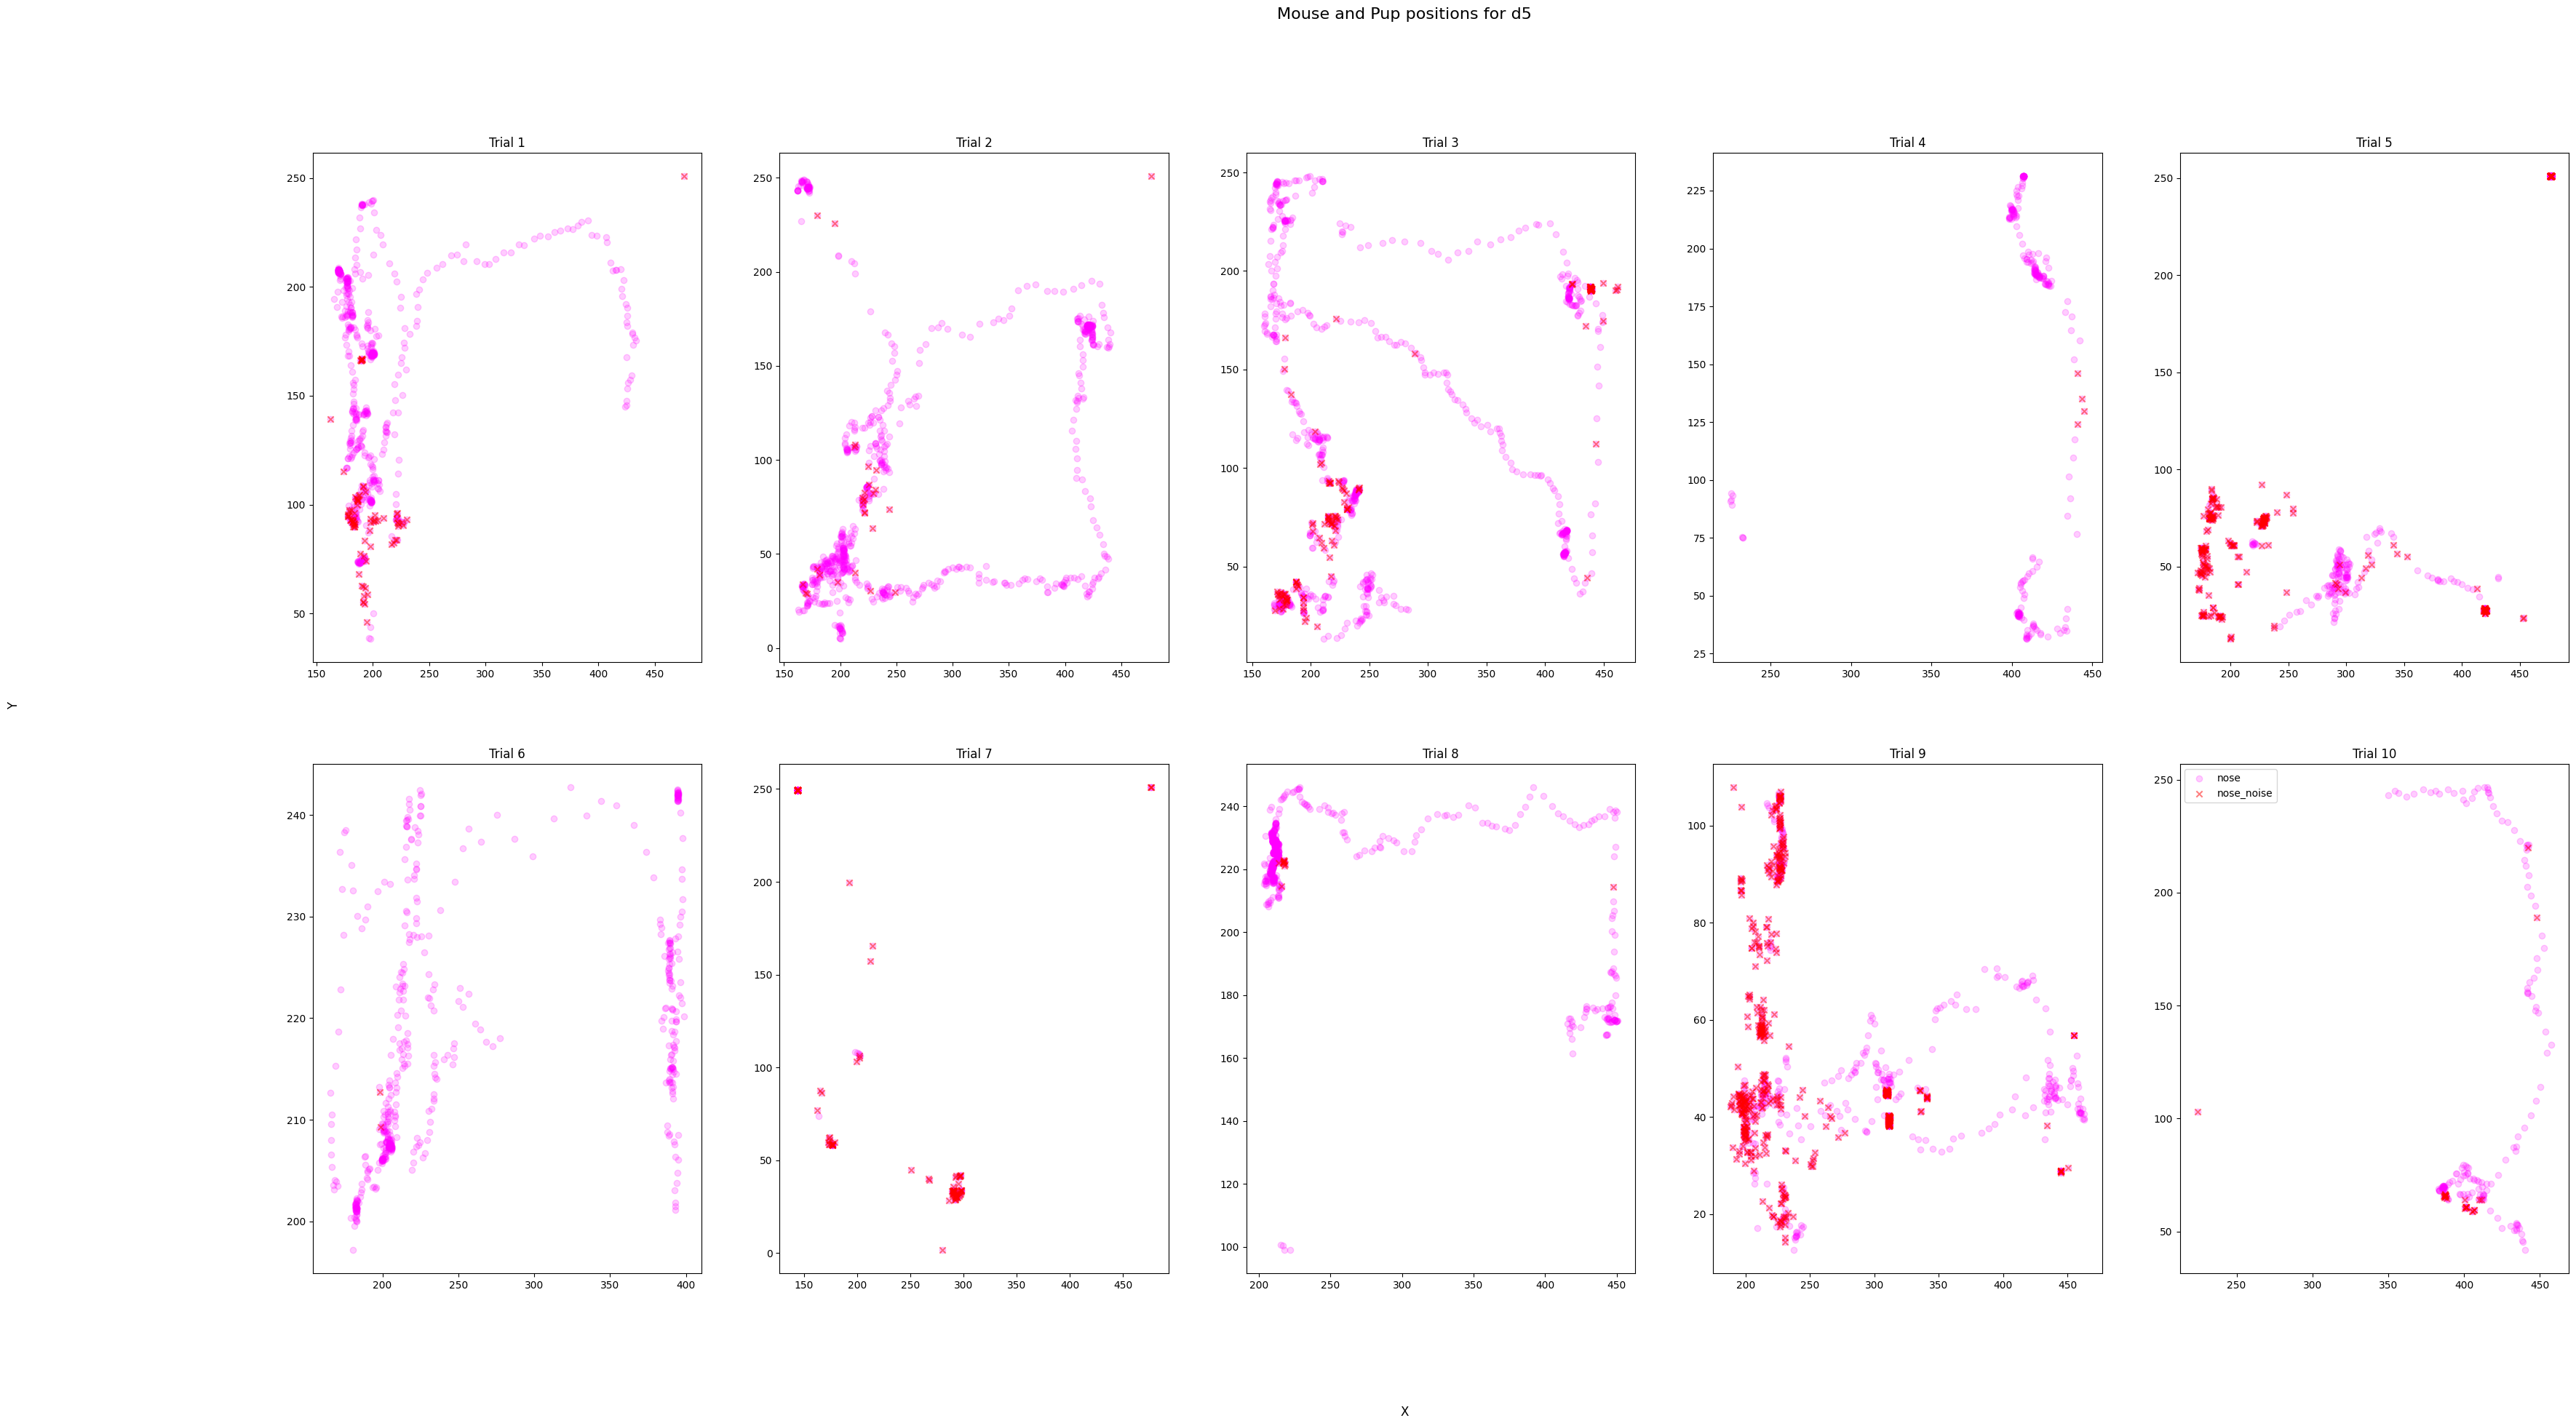

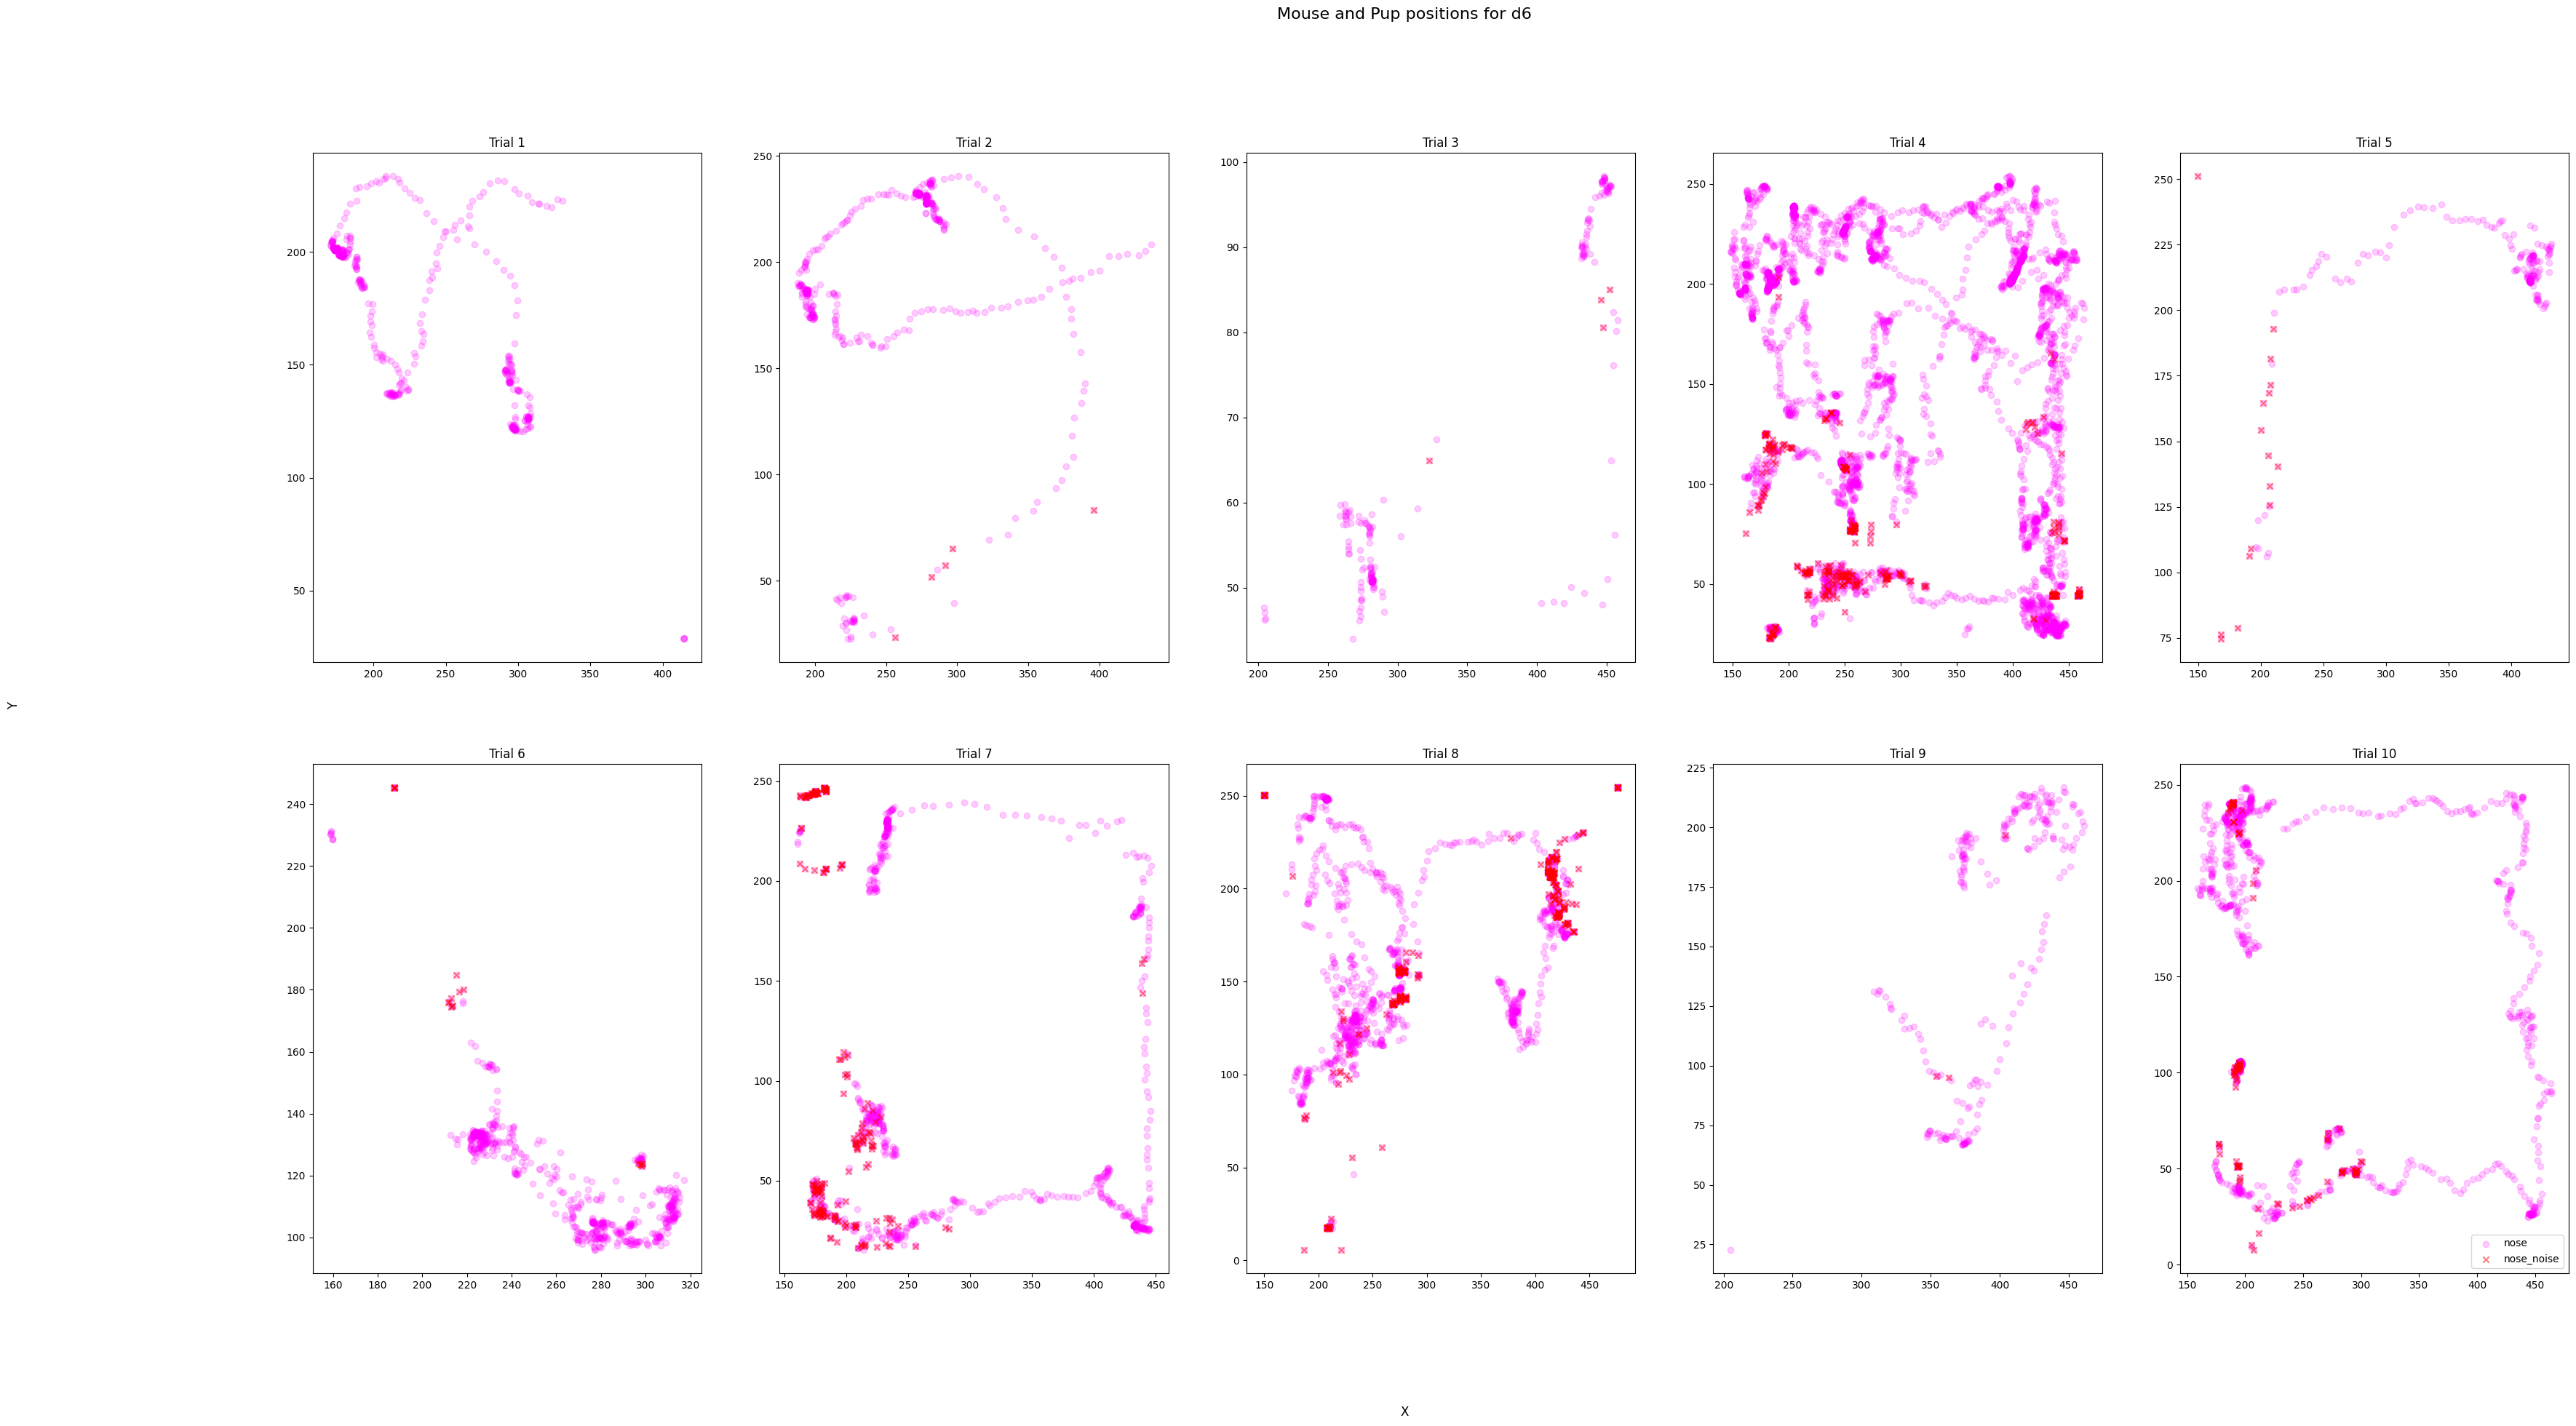

In [65]:
for day, items in full_data.items():   

    d1_trials = items['Behavior']['trials']

    # plot mouse and pup positions
    fig, ax = plt.subplots(2, 5, figsize=(40, 20))  
    # set general title
    fig.suptitle(f"Mouse and Pup positions for {day}", fontsize=16)

    for i, trial in d1_trials.items():
        
        trial = d1_trials[i]
        # mask low likelihoods
        threshold = 0.05

        for body_part, coords in dict_body_parts_to_coords.items():

            x = trial[coords["x"]]
            y = trial[coords["y"]]
            likelihood = trial[coords["likelihood"]]

            color = coords["color"]
            mask = likelihood < threshold

            ax[(i-1)//5, (i-1)%5].scatter(x, y, label=body_part, alpha=0.2, color = color)
            ax[(i-1)//5, (i-1)%5].scatter(x[mask],y[mask], label=body_part+"_noise", alpha=0.5, marker = 'x', color = 'red')
            ax[(i-1)//5, (i-1)%5].set_title(f"Trial {i}")

    plt.legend()
    plt.show()

